## Importando Bibliotecas

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Funções

## Carregando a Base

In [75]:
# Caso 
df = pd.read_csv("./Bases/base.csv")

## Análise Exploratória

In [76]:
# Convertendo Coluna date para datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ordenar o dataframe por state e date para garantir que as datas estejam em ordem
df = df.sort_values(by=['state', 'date'])

# Agrupar por estado e calcular a diferença dia a dia
df['confirmed_daily'] = df.groupby('state')['confirmed'].diff().fillna(df['confirmed'])
df['deaths_daily'] = df.groupby('state')['deaths'].diff().fillna(df['deaths'])
df['death_rate_daily'] = df['deaths_daily'] / df['confirmed_daily']

Verificando as colunas presentes no df:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19762 entries, 1455 to 17593
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            19762 non-null  datetime64[ns]
 1   state                           19762 non-null  object        
 2   confirmed                       19762 non-null  int64         
 3   deaths                          19762 non-null  int64         
 4   order_for_place                 19762 non-null  int64         
 5   is_last                         19762 non-null  bool          
 6   estimated_population            19762 non-null  float64       
 7   confirmed_per_100k_inhabitants  19756 non-null  float64       
 8   death_rate                      19762 non-null  float64       
 9   confirmed_daily                 19762 non-null  float64       
 10  deaths_daily                    19762 non-null  float64       
 11  deat

In [78]:
# Convertendo Coluna date para datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ordenar o dataframe por state e date para garantir que as datas estejam em ordem
df = df.sort_values(by=['state', 'date'])

# Agrupar por estado e calcular a diferença dia a dia
df['confirmed_daily'] = df.groupby('state')['confirmed'].diff().fillna(df['confirmed'])
df['deaths_daily'] = df.groupby('state')['deaths'].diff().fillna(df['deaths'])
df['death_rate_daily'] = df['deaths_daily'] / df['confirmed_daily']

In [79]:
df.describe().T

c:\Users\João\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std
date,19762,2021-03-17 23:14:49.343183872,2020-02-25 00:00:00,2020-09-14 00:00:00,2021-03-17 00:00:00,2021-09-17 00:00:00,2022-03-27 00:00:00,NaN
confirmed,19762.0,465498.105354,0.0,85816.5,244257.5,539522.75,5232374.0,688475.302036
deaths,19762.0,12465.451624,0.0,1842.0,6043.5,13558.5,167110.0,21652.086659
order_for_place,19762.0,366.612337,1.0,183.25,366.0,549.0,750.0,211.548197
estimated_population,19762.0,7913264.095233,631181.0,2809394.0,4064052.0,9616621.0,46289333.0,9188175.447382
confirmed_per_100k_inhabitants,19756.0,6951.675635,0.00216,2355.830548,6128.78199,10544.970693,25521.03172,5490.161951
death_rate,19762.0,0.02639,0.0,0.0195,0.0234,0.0281,0.2222,0.014829
confirmed_daily,19762.0,1510.461492,-12028.0,189.0,618.0,1535.75,105200.0,3032.264866
deaths_daily,19762.0,33.354873,-84.0,3.0,11.0,31.0,1389.0,74.475117
death_rate_daily,19574.0,inf,-0.972727,0.009317,0.01989,0.035831,inf,NaN


- Verificando Nulos

In [80]:
df.isnull().sum()

date                                0
state                               0
confirmed                           0
deaths                              0
order_for_place                     0
is_last                             0
estimated_population                0
confirmed_per_100k_inhabitants      6
death_rate                          0
confirmed_daily                     0
deaths_daily                        0
death_rate_daily                  188
dtype: int64

- Eliminando Duplicadas

In [81]:
df.drop_duplicates()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,confirmed_daily,deaths_daily,death_rate_daily
1455,2020-03-17,AC,3,0,1,False,894470.0,0.33539,0.0000,3.0,0.0,0.000000
1454,2020-03-18,AC,3,0,2,False,894470.0,0.33539,0.0000,0.0,0.0,NaN
1453,2020-03-19,AC,4,0,3,False,894470.0,0.44719,0.0000,1.0,0.0,0.000000
1452,2020-03-20,AC,7,0,4,False,894470.0,0.78259,0.0000,3.0,0.0,0.000000
1451,2020-03-21,AC,11,0,5,False,894470.0,1.22978,0.0000,4.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17597,2022-03-21,TO,302166,4141,690,False,1590248.0,19001.18724,0.0137,300.0,1.0,0.003333
17596,2022-03-22,TO,302289,4141,691,False,1590248.0,19008.92188,0.0137,123.0,0.0,0.000000
17595,2022-03-23,TO,302387,4142,692,False,1590248.0,19015.08444,0.0137,98.0,1.0,0.010204
17594,2022-03-24,TO,302443,4142,693,False,1590248.0,19018.60590,0.0137,56.0,0.0,0.000000


##

## Análise Univariada

- Date

In [82]:
print(f"Date mínimo = {df['date'].min()}")
print(f"Date máximo = {df['date'].max()}")

Date mínimo = 2020-02-25 00:00:00
Date máximo = 2022-03-27 00:00:00


- estimated_population

Text(0.5, 1.0, 'Distribuição da População Estimada')

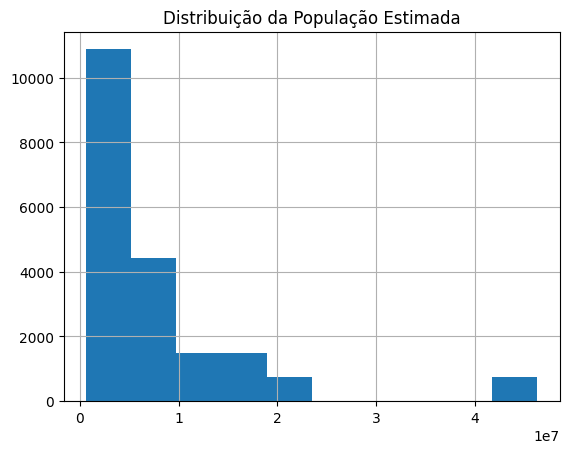

In [83]:
df['estimated_population'].hist()
plt.title('Distribuição da População Estimada')

- confirmed_daily e deaths_Daily

<Axes: >

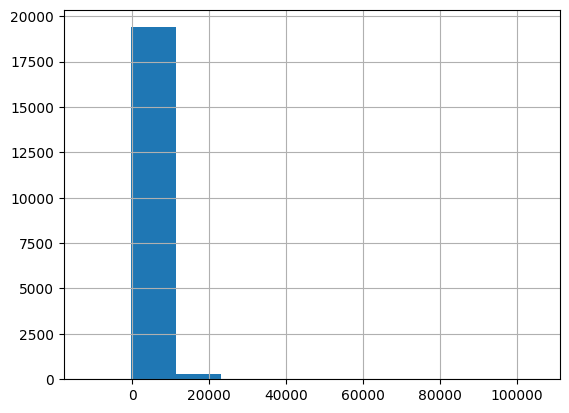

In [84]:
df['confirmed_daily'].hist()

<Axes: >

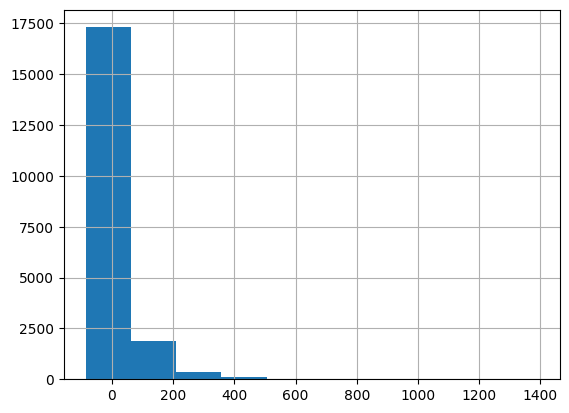

In [85]:
df['deaths_daily'].hist()

## Análise Bivariada

### Séries Temporais

- Série Temporal por dia

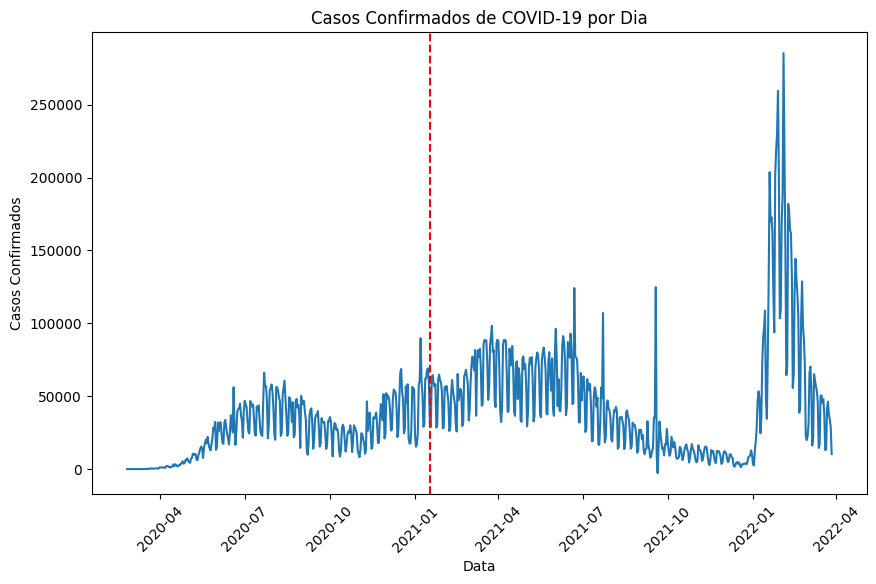

In [86]:
# Resampleando os dados por dia
df_resampled = df.resample('D', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Dia')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


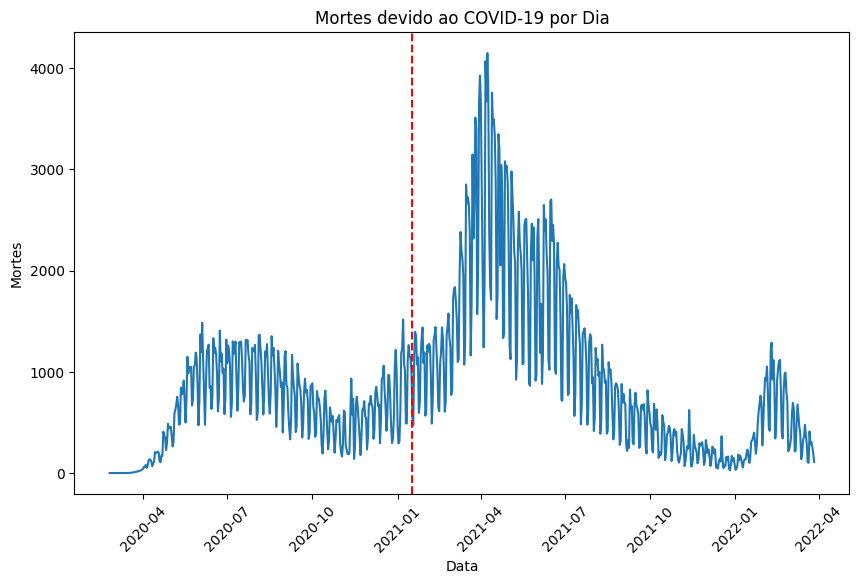

In [87]:
# Resampleando os dados por dia
df_resampled = df.resample('D', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Dia')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


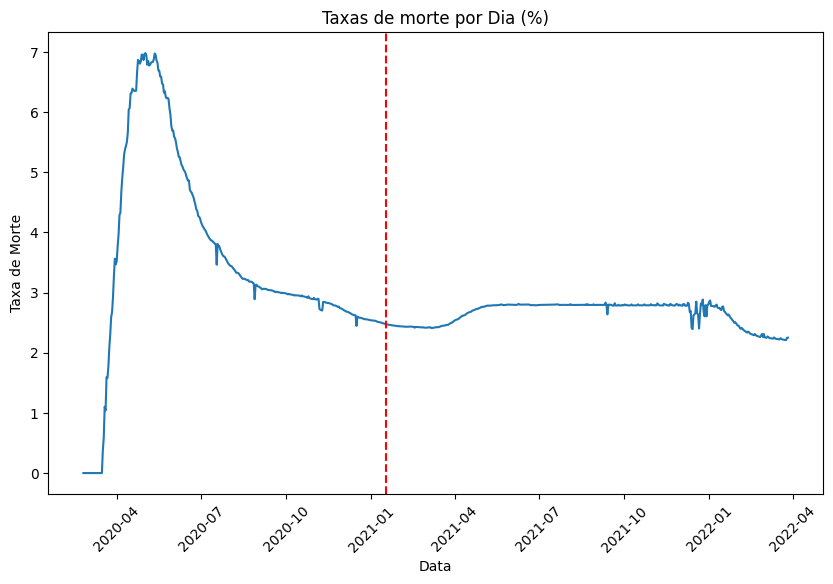

In [88]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('D', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Dia (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

- Série Temporal por Semana

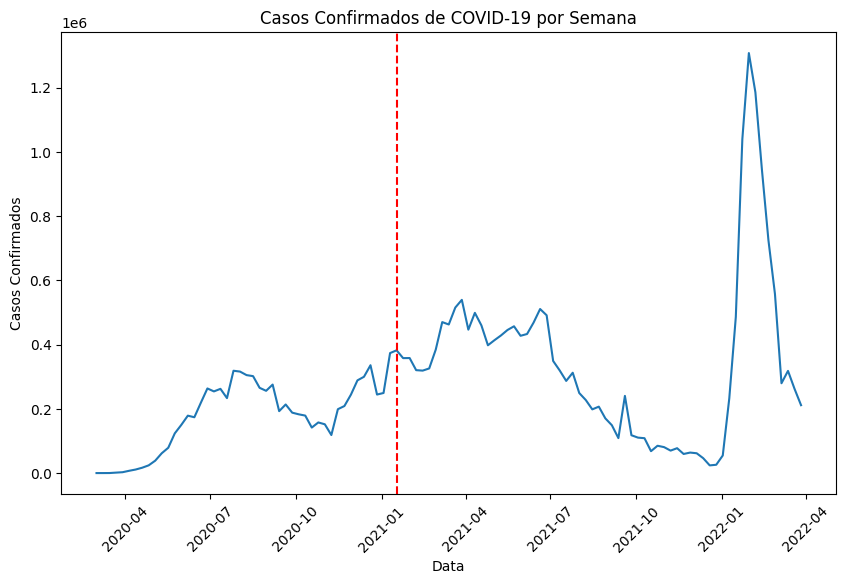

In [89]:
# Resampleando os dados por dia
df_resampled = df.resample('W', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Semana')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


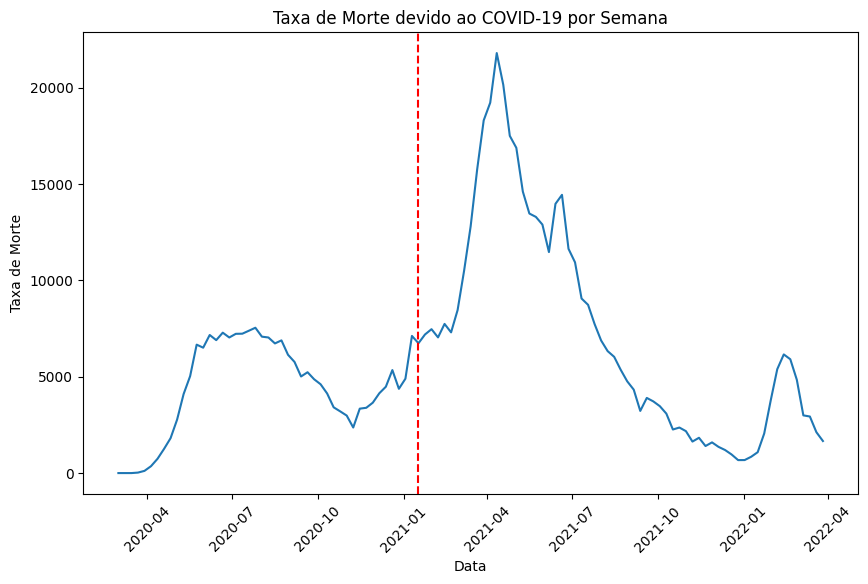

In [90]:
# Resampleando os dados por dia
df_resampled = df.resample('W', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxa de Morte devido ao COVID-19 por Semana')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()


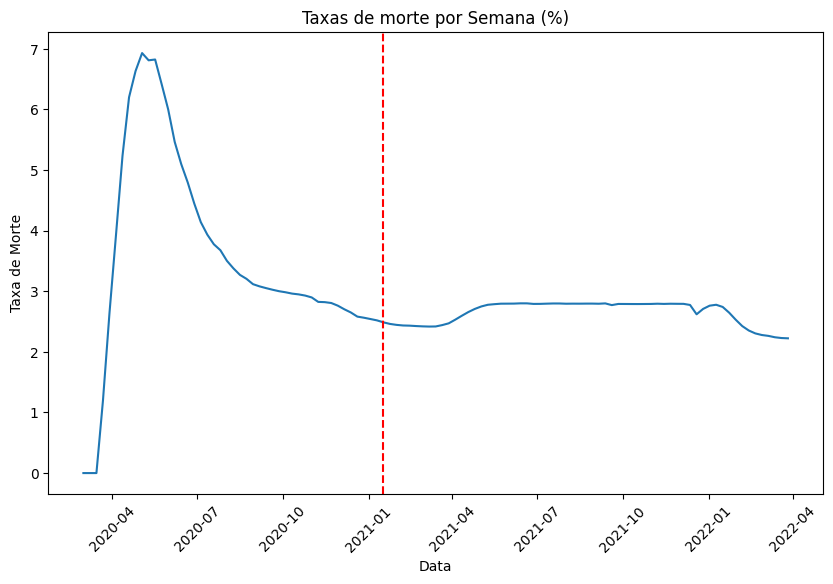

In [91]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('W', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Semana (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

- Série Temporal por mês

C:\Users\João\AppData\Local\Temp\ipykernel_21948\437576797.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


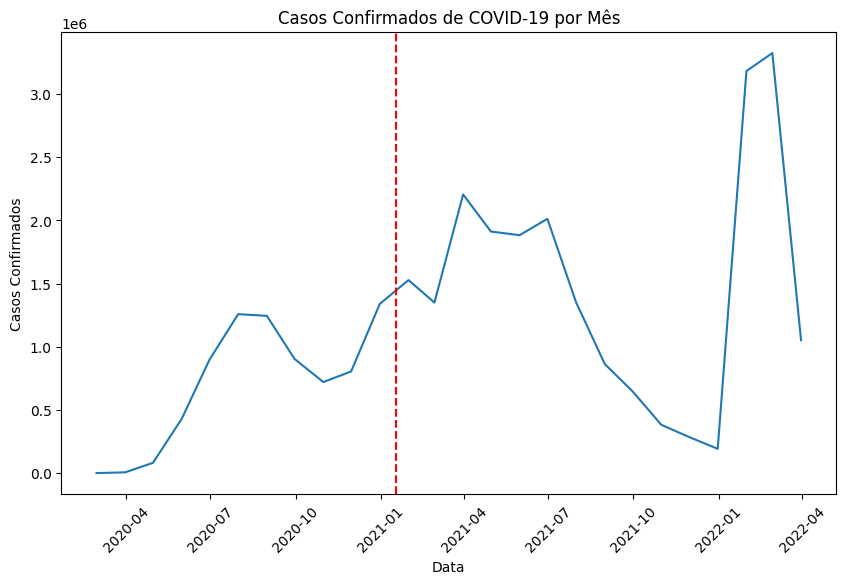

In [92]:
# Resampleando os dados por dia
df_resampled = df.resample('M', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Mês')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


C:\Users\João\AppData\Local\Temp\ipykernel_21948\515525062.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


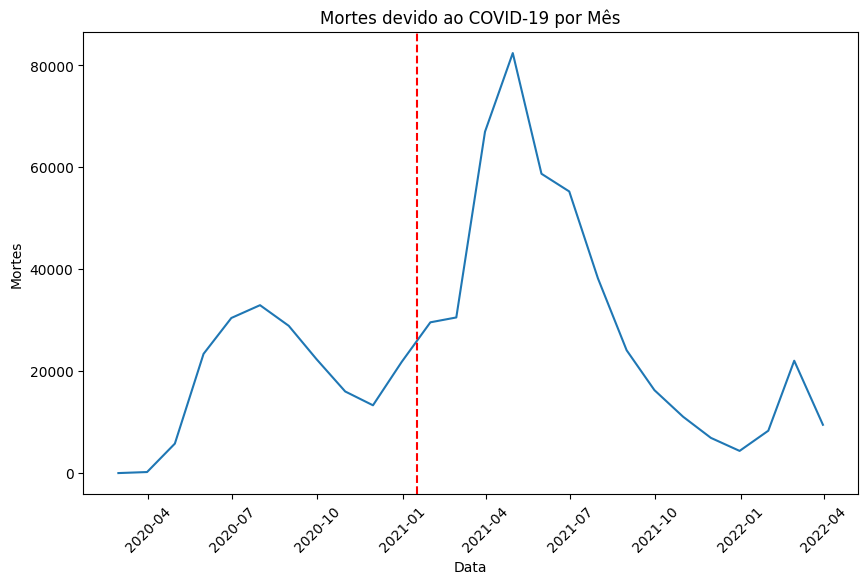

In [93]:
# Resampleando os dados por dia
df_resampled = df.resample('M', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Mês')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


C:\Users\João\AppData\Local\Temp\ipykernel_21948\1415844574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


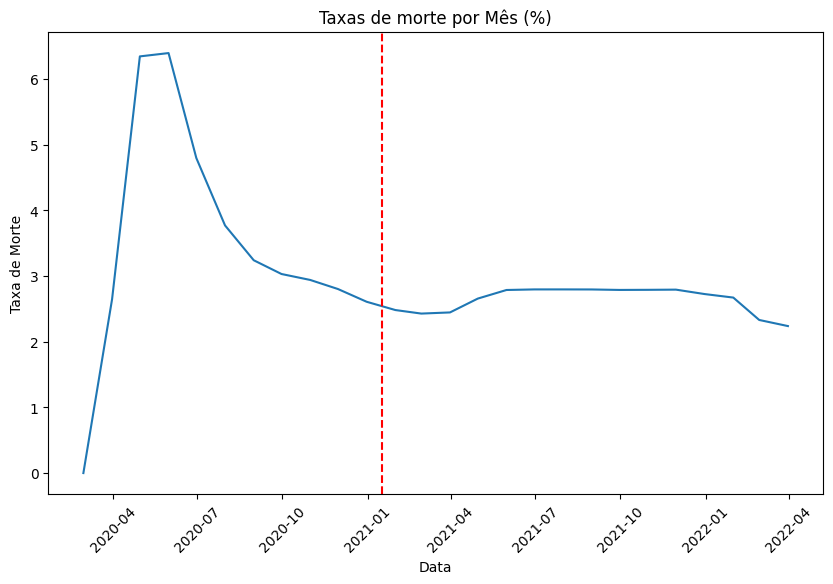

In [94]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('M', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Mês (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

#### Desenvolvendo uma análise de correlação para entender onde as mortes podem estar acontecendo mais frequentemente:

<Axes: >

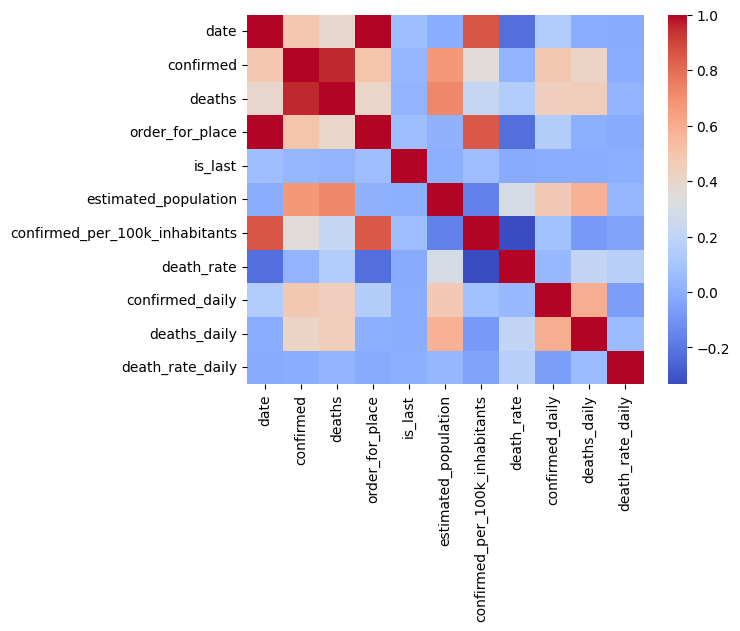

In [95]:
df_quant = df.loc[:, ~df.columns.isin(['state'])]
df_quant_corr = df_quant.corr()

sns.heatmap(df_quant_corr, cmap='coolwarm')

Pode-se perceber que o número de mortes está diretamente correlacionado com o número de casos confirmados, o que acaba sendo algo óbvio. No entanto, a taxa de mortes (death_rate) é inversamente correlacionada o número de casos confirmados a cada 100k habitantes, o que é curioso. Essa correlação de 0.0177 sugere que a taxa de mortalidade depende de outros fatores, como qualidade do atendimento médico, demografia, e a presença de comorbidades, não estando diretamente conectada a quantidade de habitantes.

Mortes por estado:

<Axes: xlabel='state', ylabel='deaths'>

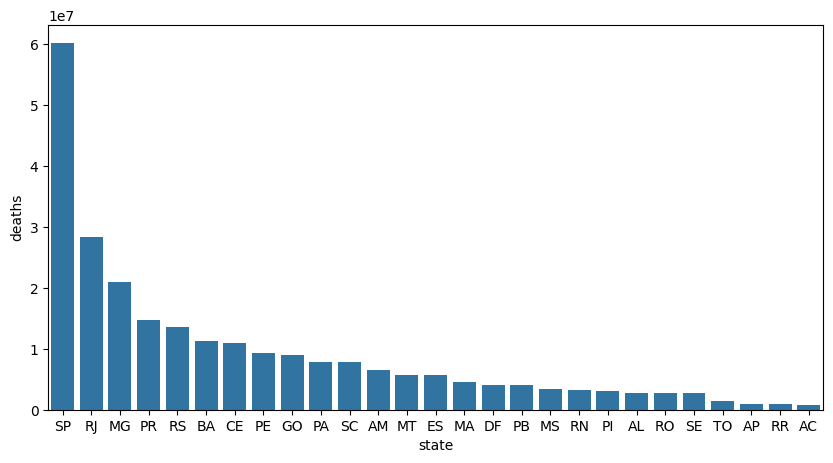

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(df.groupby('state')['deaths'].sum().sort_values(ascending=False))

Taxa de mortes por estado:

<Axes: xlabel='state', ylabel='death_rate'>

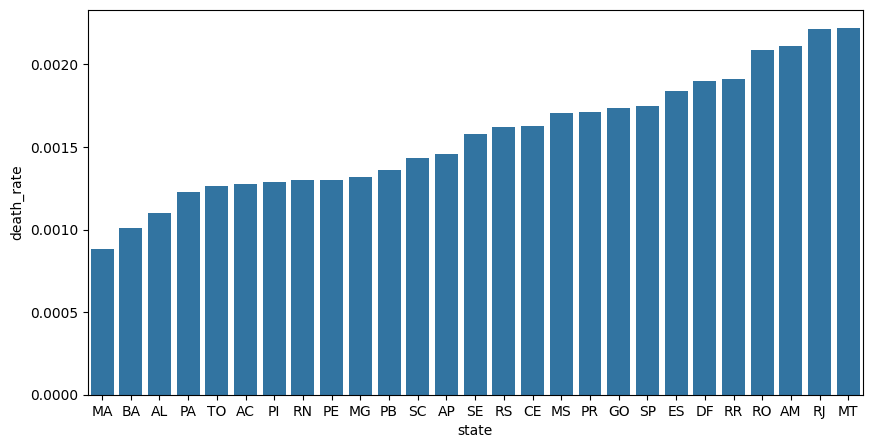

In [97]:
df_death_rate_state = df.groupby('state')[['deaths', 'estimated_population']].sum()
df_death_rate_state['death_rate'] = df_death_rate_state['deaths'].combine(df_death_rate_state['estimated_population'], lambda x, y: x/y)

plt.figure(figsize=(10, 5))
sns.barplot(df_death_rate_state.sort_values('death_rate'), x='state', y='death_rate')

Apesar de São Paulo ter o maior número de mortes, ele vem em 8º lugar em relação taxa de mortes, porque apresenta um número menor de mortes quando comparada a população total do que outros estados. Isso significa que, proporcionalmente, outras regiões com populações menores podem estar enfrentando uma situação mais severa, indicando que a carga sobre o sistema de saúde é distribuída de forma desigual.

Ao avaliar dados de mortalidade, é importante considerar tanto os números absolutos quanto os proporcionais (por 100 mil habitantes) para desenvolver estratégias de saúde pública mais eficazes e equitativas.

Antes vs Depois da vacinação:

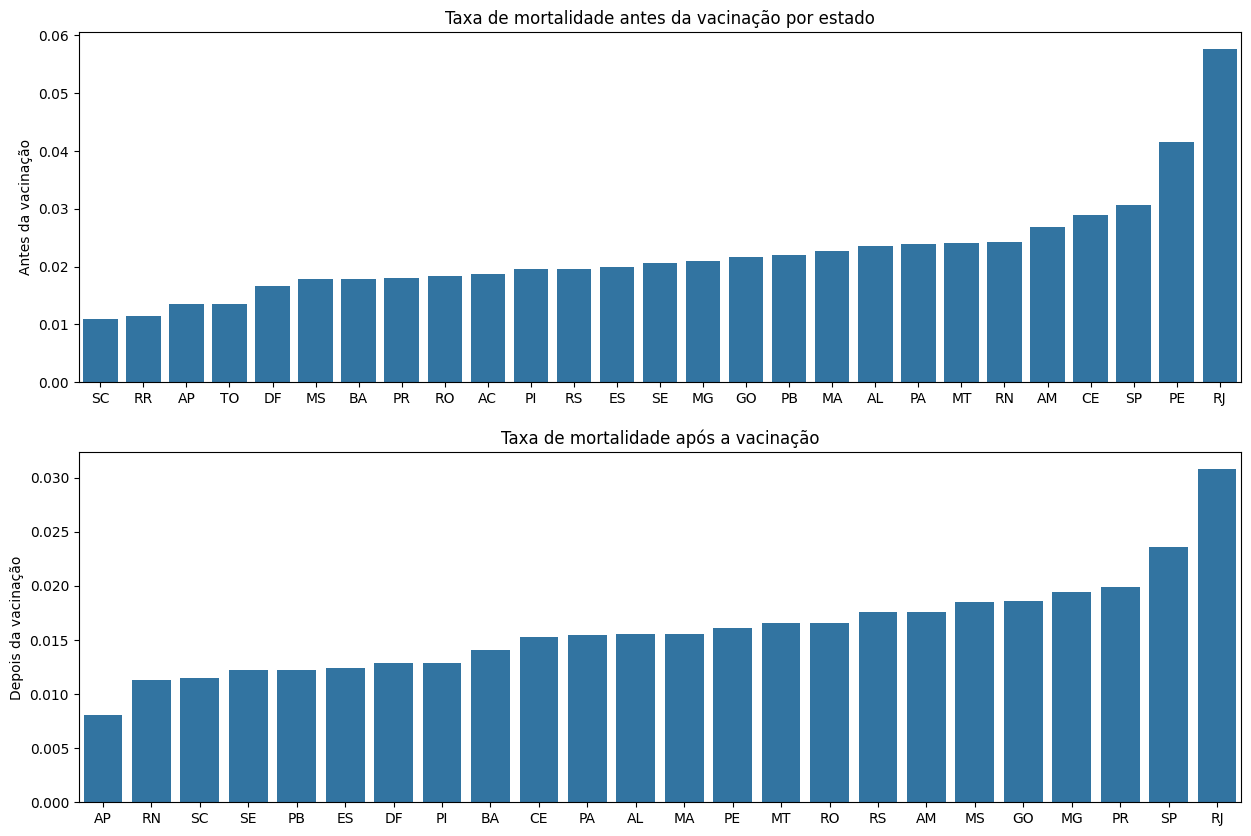

In [98]:
df_per_state_20 = df.loc[df['date'] == inicio_vacinacao, :].reset_index(drop=True)
df_per_state_20['death_rate'] = df_per_state_20['deaths'].combine(df_per_state_20['confirmed'], lambda x, y: x/y)

df_per_state_21 = pd.merge(df.loc[df['date'] == pd.to_datetime('31-12-2021', dayfirst=True), :].reset_index(drop=True), df_per_state_20, on='state', suffixes=['', '_20'])
df_per_state_21['deaths'] = df_per_state_21['deaths'] - df_per_state_21['deaths_20']

df_per_state_21['death_rate'] = df_per_state_21['deaths'].combine(df_per_state_21['confirmed'], lambda x, y: x/y)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(df_per_state_20.sort_values('death_rate'), x='state', y='death_rate')
plt.title('Taxa de mortalidade antes da vacinação por estado')
plt.xlabel('')
plt.ylabel('Antes da vacinação')


plt.subplot(2, 1, 2)
sns.barplot(df_per_state_21.sort_values('death_rate'), x='state', y='death_rate')
plt.title('Taxa de mortalidade após a vacinação')
plt.xlabel('')
plt.ylabel('Depois da vacinação');

* Uma Análise sobre outliers em 'confirmed', 'deaths' e 'death_rate'
    * Justificando a apresentação da taxa de mortalidade estimada. 
    * A média (465.498) é significativamente maior que a mediana (244.257,5), sugerindo uma distribuição enviesada na parte superior, pois existem locais que possuem um número extremamente alto de casos confirmados.
    * Há uma necessidade de normalizar a base de dados, conforme se demonstram nos gráficos bloxplot abaixos.

In [99]:
# média de casos confirmads 
df['confirmed'].mean()

np.float64(465498.10535370914)

In [100]:
# mediana de casos confirmads 
df['confirmed'].median()

np.float64(244257.5)

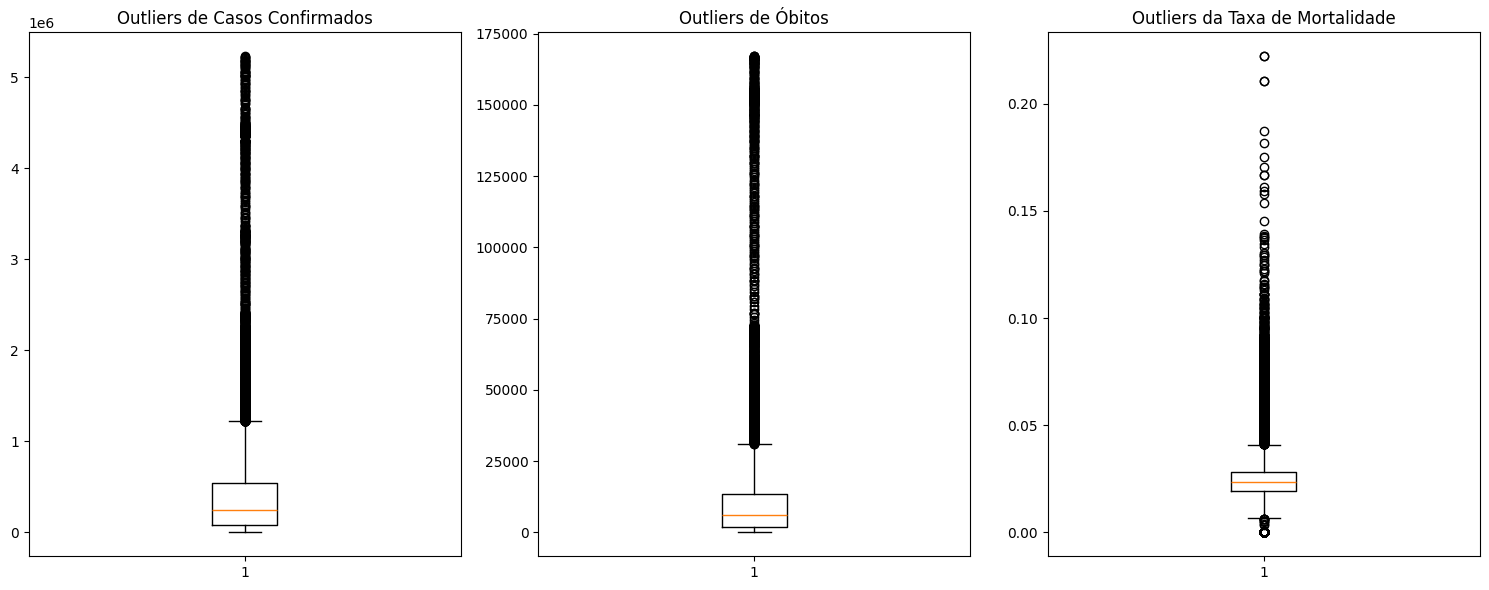

In [101]:
# visualizando outliers em 'confirmed', 'deaths' e 'death_rate'
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df['confirmed'])
plt.title('Outliers de Casos Confirmados')

plt.subplot(1, 3, 2)
plt.boxplot(df['deaths'])
plt.title('Outliers de Óbitos')

plt.subplot(1, 3, 3)
plt.boxplot(df['death_rate'])
plt.title('Outliers da Taxa de Mortalidade')

plt.tight_layout()
plt.show()

- Casos Confirmados e Mortes por Estado


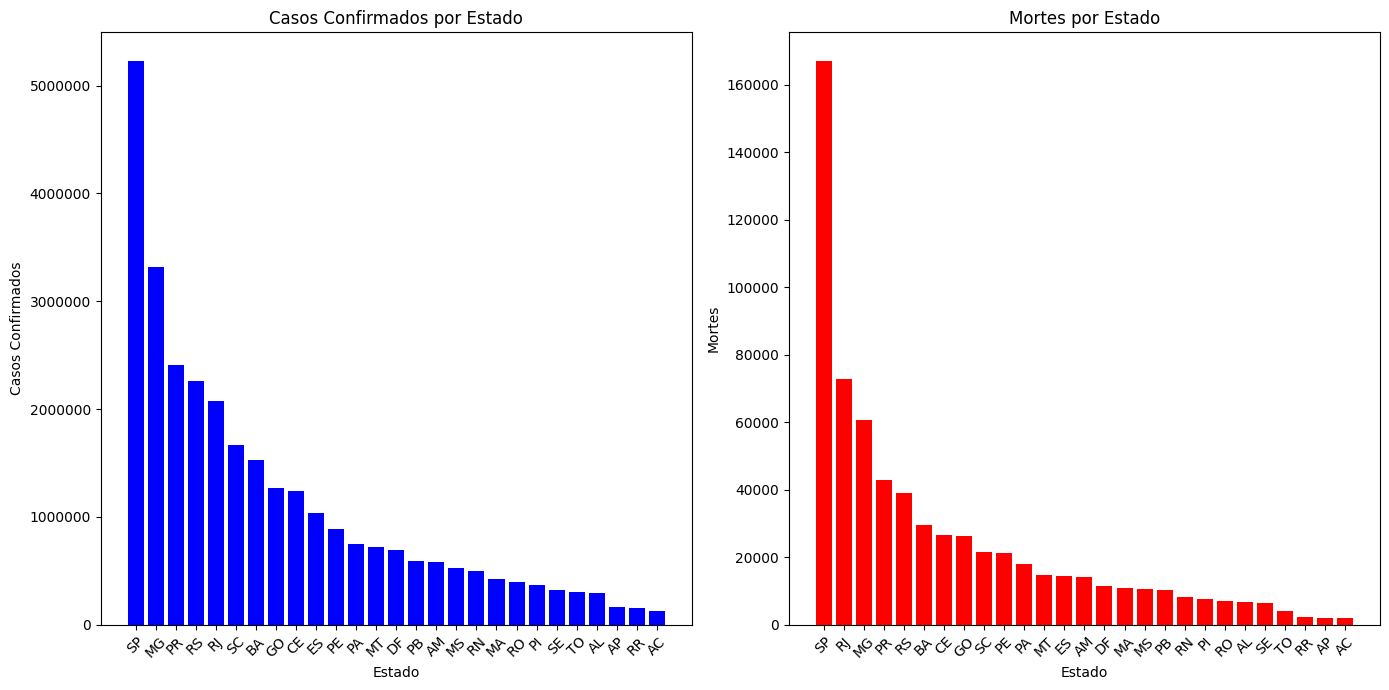

In [102]:
state_totals = df.groupby('state').agg({
    'confirmed_daily': 'sum',
    'deaths_daily': 'sum',
    'confirmed_per_100k_inhabitants': 'mean',
    'death_rate_daily': 'mean'
}).reset_index()

# Ordenar por casos confirmados em ordem decrescente para o gráfico de casos confirmados
state_totals_sorted_by_confirmed = state_totals.sort_values(by='confirmed_daily', ascending=False)

# Ordenar por mortes em ordem decrescente para o gráfico de mortes
state_totals_sorted_by_deaths = state_totals.sort_values(by='deaths_daily', ascending=False)

# Configuração dos gráficos
plt.figure(figsize=(14, 7))

# Gráfico de Casos Confirmados
plt.subplot(1, 2, 1)
plt.bar(state_totals_sorted_by_confirmed['state'], state_totals_sorted_by_confirmed['confirmed_daily'], color='blue')
plt.xlabel('Estado')
plt.ylabel('Casos Confirmados')
plt.title('Casos Confirmados por Estado')
plt.xticks(rotation=45)  # Para melhorar a leitura dos nomes dos estados
plt.gca().ticklabel_format(style='plain', axis='y')  # Evita notação científica no eixo Y

# Gráfico de Mortes
plt.subplot(1, 2, 2)
plt.bar(state_totals_sorted_by_deaths['state'], state_totals_sorted_by_deaths['deaths_daily'], color='red')
plt.xlabel('Estado')
plt.ylabel('Mortes')
plt.title('Mortes por Estado')
plt.xticks(rotation=45)  # Para melhorar a leitura dos nomes dos estados
plt.gca().ticklabel_format(style='plain', axis='y')  # Evita notação científica no eixo Y

plt.tight_layout()
plt.show()

- Top 10 Estados com mais confirmados e mortes

C:\Users\João\AppData\Local\Temp\ipykernel_21948\3750263656.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confirmed', y='state', data=top_states_confirmed, palette='viridis', ax=ax1)
C:\Users\João\AppData\Local\Temp\ipykernel_21948\3750263656.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deaths', y='state', data=top_states_deaths, palette='magma', ax=ax2)


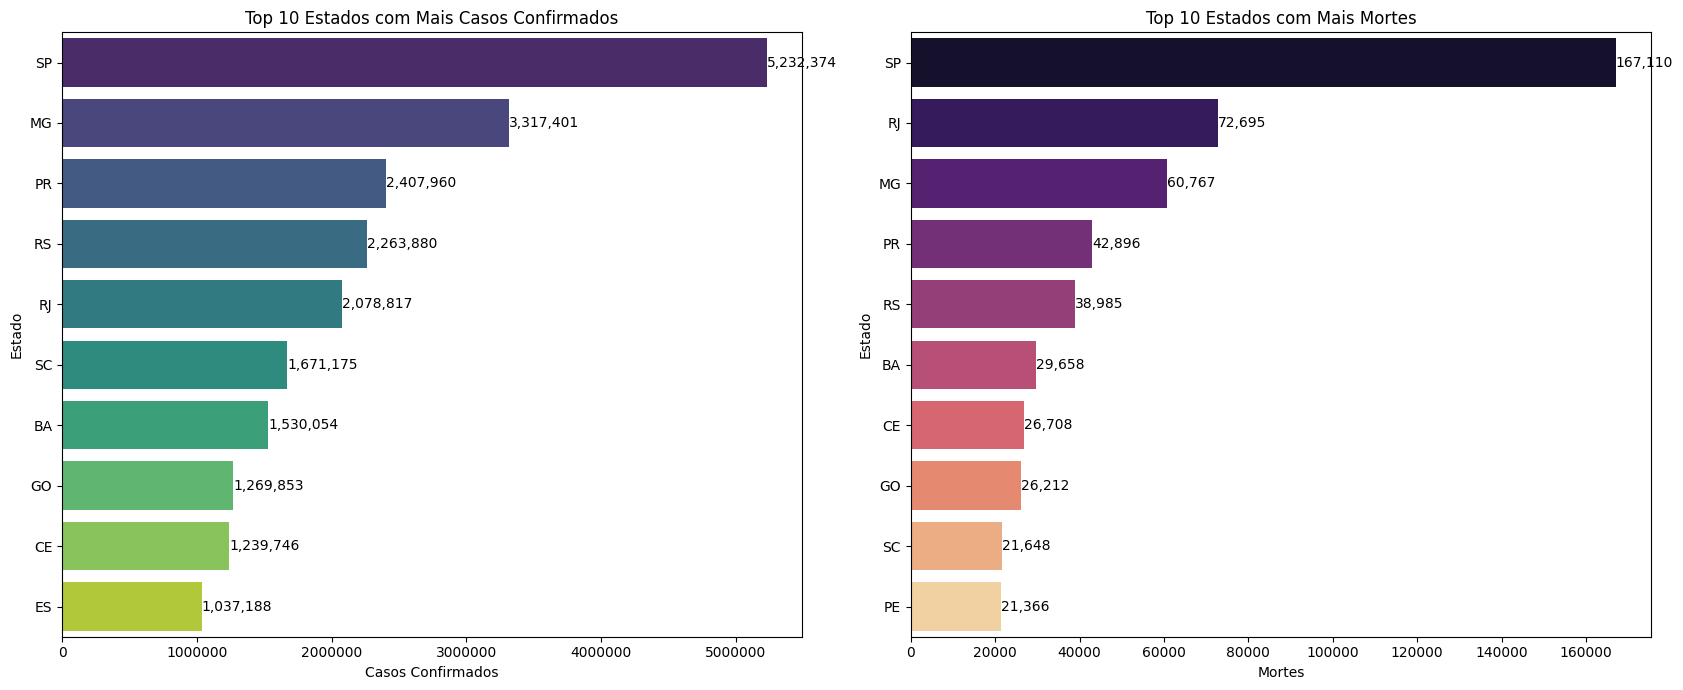

In [103]:
# Agrupar por estado e calcular estatísticas agregadas
state_summary = df.groupby('state').agg({
    'confirmed': 'max',
    'deaths': 'max',
    'confirmed_per_100k_inhabitants': 'mean',
    'death_rate': 'mean',
    'confirmed_daily': 'mean',
    'deaths_daily': 'mean',
    'death_rate_daily': 'mean'
}).reset_index()

# Top 10 estados com mais casos confirmados e mortes
top_states_confirmed = state_summary.nlargest(10, 'confirmed')
top_states_deaths = state_summary.nlargest(10, 'deaths')

# Função para adicionar rótulos aos gráficos de barras
def add_labels(ax, data, x_col):
    for i, value in enumerate(data[x_col]):
        ax.text(value, i, f'{int(value):,}', va='center', ha='left', fontsize=10)

plt.figure(figsize=(17, 7))

# Gráfico de casos confirmados
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='confirmed', y='state', data=top_states_confirmed, palette='viridis', ax=ax1)
add_labels(ax1, top_states_confirmed, 'confirmed')
ax1.set(title='Top 10 Estados com Mais Casos Confirmados', xlabel='Casos Confirmados', ylabel='Estado')
ax1.ticklabel_format(style='plain', axis='x')  # Evitar notação científica no eixo X

# Gráfico de mortes
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='deaths', y='state', data=top_states_deaths, palette='magma', ax=ax2)
add_labels(ax2, top_states_deaths, 'deaths')
ax2.set(title='Top 10 Estados com Mais Mortes', xlabel='Mortes', ylabel='Estado')
ax2.ticklabel_format(style='plain', axis='x')  # Evitar notação científica no eixo X

plt.tight_layout()
plt.show()

- Total de casos por estado

C:\Users\João\AppData\Local\Temp\ipykernel_21948\3394271858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='confirmed_daily', y='state', data=state_summary_sorted_confirmed, palette='viridis')


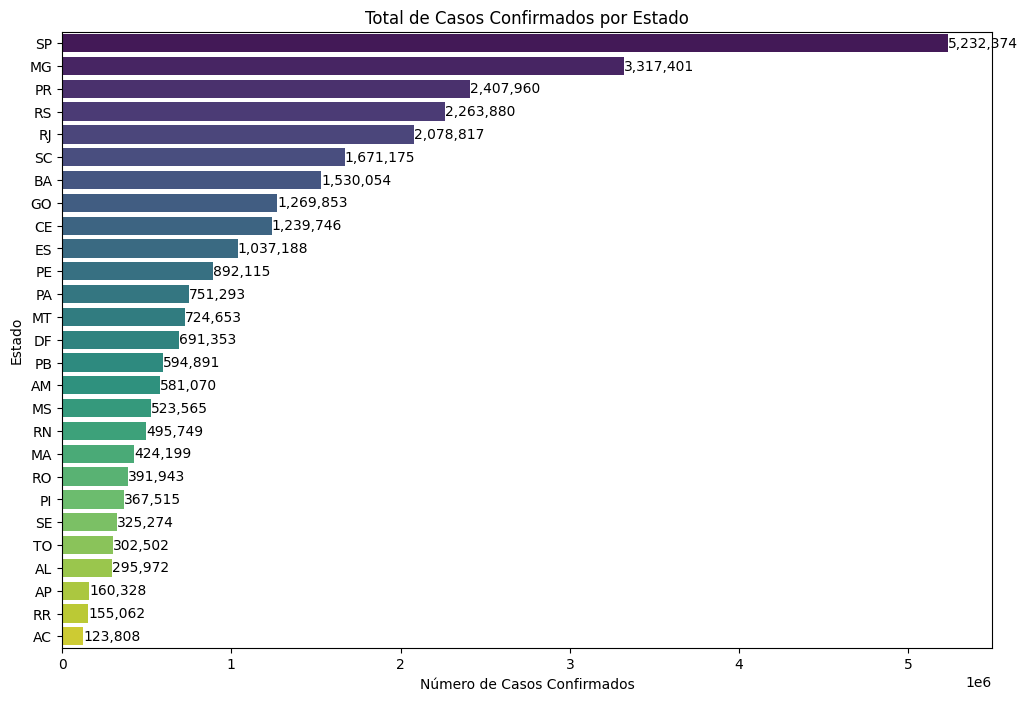

C:\Users\João\AppData\Local\Temp\ipykernel_21948\3394271858.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='deaths_daily', y='state', data=state_summary_sorted_deaths, palette='magma')


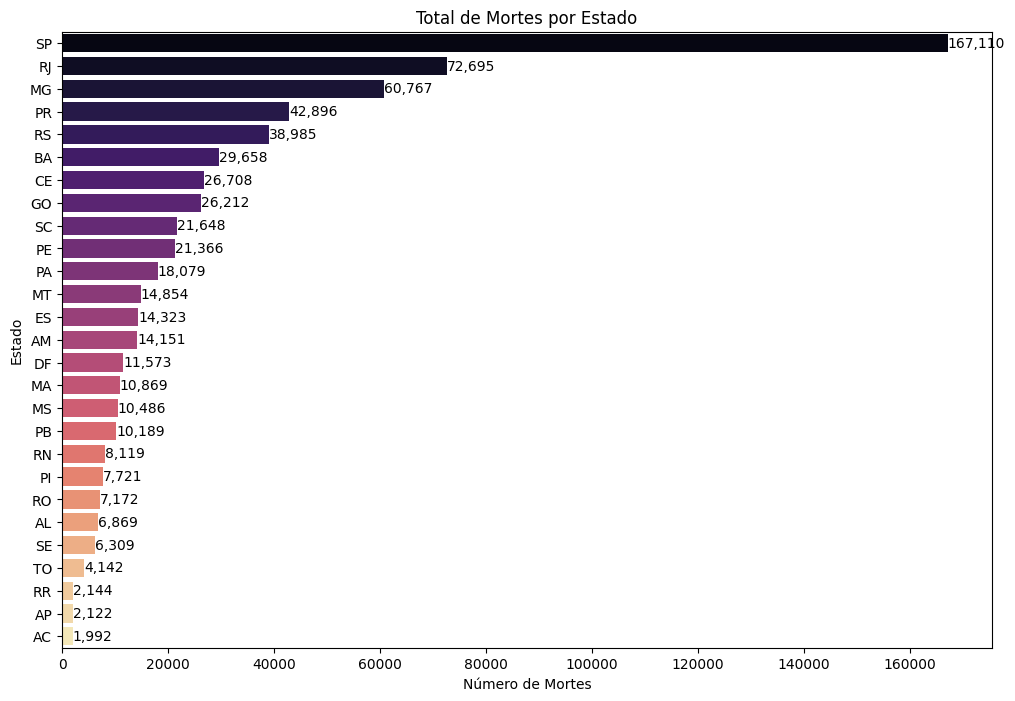

In [104]:
# Agregar os dados por estado
state_summary = df.groupby('state').agg({
    'confirmed_daily': 'sum',
    'deaths_daily': 'sum'
}).reset_index()

# Ordenar os estados pelo número de casos confirmados e mortes
state_summary_sorted_confirmed = state_summary.sort_values(by='confirmed_daily', ascending=False)
state_summary_sorted_deaths = state_summary.sort_values(by='deaths_daily', ascending=False)

# Função para adicionar rótulos aos gráficos de barras
def add_labels(ax, data, x_col, y_col):
    for index, value in enumerate(data[x_col]):
        ax.text(value, index, f'{int(value):,}', va='center', ha='left', fontsize=10)

# Plotar gráfico de barras para casos confirmados
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='confirmed_daily', y='state', data=state_summary_sorted_confirmed, palette='viridis')
add_labels(ax1, state_summary_sorted_confirmed, 'confirmed_daily', 'state')
plt.title('Total de Casos Confirmados por Estado')
plt.xlabel('Número de Casos Confirmados')
plt.ylabel('Estado')
plt.show()

# Plotar gráfico de barras para mortes
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='deaths_daily', y='state', data=state_summary_sorted_deaths, palette='magma')
add_labels(ax2, state_summary_sorted_deaths, 'deaths_daily', 'state')
plt.title('Total de Mortes por Estado')
plt.xlabel('Número de Mortes')
plt.ylabel('Estado')
plt.show()

* identificando Estados Semelhantes e Distintos:
    * Calcular a média de death_rate e confirmed_per_100k_inhabitants por estado e ao longo do tempo.
    * Usar uma medida de similaridade, como a correlação, para encontrar estados com comportamentos semelhantes.
    * Há uma forte correlação entre Estado x Mortalidade de alguns Estados com diferentes populações e localidades
    * Há uma forte correlação entre Estado x Casos Confirmados de alguns Estados com diferentes populações e localidades

In [105]:
# criando uma cópia da base de dados para análise
df_like = df.copy()

# agrupando por Estado e Data para calcular médias semanais de death_rate e confirmed_per_100k_inhabitants
df_like_grouped = df_like.groupby(['state', pd.Grouper(key='date', freq='W')])[['death_rate', 'confirmed_per_100k_inhabitants']].mean().reset_index()

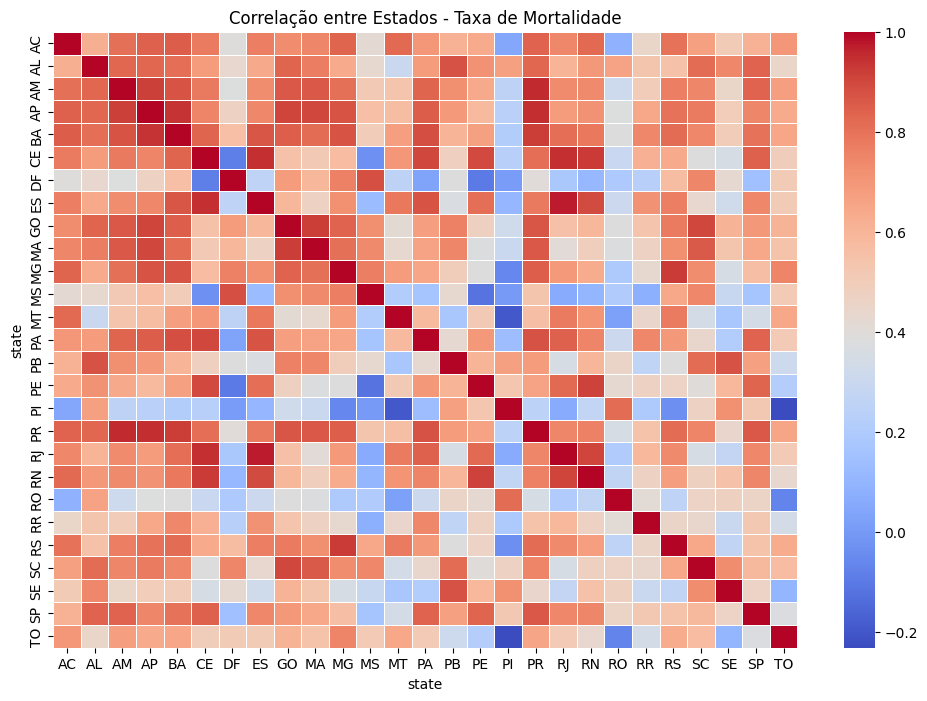

In [106]:
# análise de similaridade
df_like_pivot = df_like_grouped.pivot(index='date', columns='state', values='death_rate')
correlation_matrix = df_like_pivot.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5) #sem annot=True
plt.title('Correlação entre Estados - Taxa de Mortalidade')
plt.show()

In [121]:
# tranformando a matriz de correlação Estado x Mortalidadeem um DataFrame
correlation_df_like = correlation_matrix.reset_index()
correlation_df_like.head()

state,state,AC,AL,AM,AP,BA,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,AC,1.000000,0.622889,0.805161,0.844010,0.853341,0.777663,0.392817,0.767182,0.729124,...,0.837886,0.744634,0.822458,0.081325,0.448524,0.798545,0.669991,0.507792,0.611823,0.699626
1,AL,0.622889,1.000000,0.828599,0.829611,0.810397,0.682633,0.433298,0.640033,0.835116,...,0.827120,0.603930,0.695804,0.662740,0.537769,0.551526,0.817163,0.740779,0.837924,0.449745
2,AM,0.805161,0.828599,1.000000,0.914394,0.872904,0.782777,0.383807,0.728477,0.865297,...,0.955152,0.731374,0.736522,0.315691,0.504273,0.765434,0.745417,0.446821,0.839736,0.673335
3,AP,0.844010,0.829611,0.914394,1.000000,0.940273,0.754509,0.470106,0.744166,0.906108,...,0.949740,0.684941,0.715453,0.380115,0.647295,0.802721,0.776401,0.498081,0.749470,0.638082
4,BA,0.853341,0.810397,0.872904,0.940273,1.000000,0.836145,0.561656,0.869712,0.846822,...,0.922932,0.808859,0.785760,0.386421,0.740255,0.814148,0.743539,0.503755,0.800206,0.653631


In [122]:
# Defina a coluna 'state' como índice, executado apenas 1x
correlation_df_like.set_index('state', inplace=True)

In [126]:
# matriz em um formato vertical
df_vertical = correlation_df_like.reset_index().melt(id_vars='state', var_name='state_comparado', value_name='similaridade')

# Remova as similaridades auto-referenciais (se necessário)
df_vertical = df_vertical[df_vertical['state'] != df_vertical['state_comparado']]

df_vertical.sort_values('similaridade', ascending=False).head(10).drop_duplicates('similaridade')

,state,state_comparado,similaridade
207,RJ,ES,0.972493
461,AM,PR,0.955152
98,PR,AP,0.949740
491,CE,RJ,0.944357
142,ES,CE,0.942395


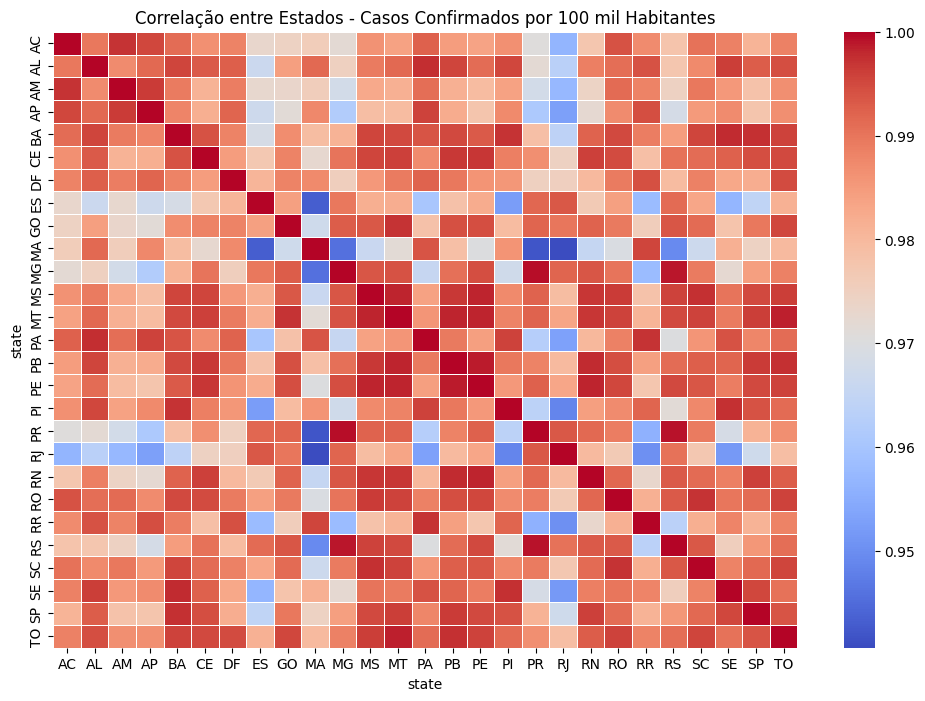

In [110]:
# correlação com 'confirmed_per_100k_inhabitants'
df_pivot_confirmed = df_like_grouped.pivot(index='date', columns='state', values='confirmed_per_100k_inhabitants')
correlation_matrix_confirmed = df_pivot_confirmed.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_confirmed, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação entre Estados - Casos Confirmados por 100 mil Habitantes')
plt.show()

In [111]:
# tranformando a matriz de correlação Estado x Mortalidadeem um DataFrame
correlation_df_like_confirmed = correlation_matrix_confirmed.reset_index()
correlation_df_like_confirmed.head() 

state,state,AC,AL,AM,AP,BA,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,AC,1.000000,0.989747,0.997188,0.995358,0.991081,0.986486,0.988401,0.973021,0.974399,...,0.970575,0.956450,0.977452,0.994199,0.987250,0.977880,0.990459,0.988425,0.980986,0.988537
1,AL,0.989747,1.000000,0.987200,0.991566,0.995524,0.993221,0.992656,0.966596,0.984414,...,0.971787,0.963206,0.988690,0.990944,0.994052,0.977438,0.987423,0.996137,0.992987,0.994642
2,AM,0.997188,0.987200,1.000000,0.996453,0.989164,0.981172,0.989058,0.972670,0.973276,...,0.967860,0.957235,0.974122,0.991410,0.988387,0.974663,0.989735,0.985344,0.978099,0.986768
3,AP,0.995358,0.991566,0.996453,1.000000,0.988176,0.981798,0.991982,0.967044,0.971362,...,0.960869,0.952854,0.972387,0.987148,0.994548,0.968290,0.984944,0.987028,0.977547,0.986793
4,BA,0.991081,0.995524,0.989164,0.988176,1.000000,0.994013,0.988233,0.968633,0.986887,...,0.978708,0.964080,0.992328,0.995059,0.989045,0.984604,0.995464,0.997851,0.997305,0.995739


In [112]:
# Defina a coluna 'state' como índice, executado apenas 1x
correlation_df_like_confirmed.set_index('state', inplace=True)

In [127]:
# matriz em um formato vertical para correlação de casos confirmados
df_vertical_confirmed = correlation_df_like_confirmed.reset_index().melt(id_vars='state', var_name='state_comparado', value_name='similaridade')

# Remova as similaridades auto-referenciais (se necessário)
df_vertical_confirmed = df_vertical_confirmed[df_vertical_confirmed['state'] != df_vertical_confirmed['state_comparado']]
df_vertical_confirmed.sort_values('similaridade', ascending=False).head(10).drop_duplicates('similaridade')

,state,state_comparado,similaridade
469,MG,PR,0.999391
611,PR,RS,0.999116
292,RS,MG,0.999029
393,PE,PB,0.998734
714,MT,TO,0.998391
